In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 30
EPOCHS = 6

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-12T20:28:31.205Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-12T20:28:31.205Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T20:28:31.206Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-12T20:28:31.206Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-12T20:28:31.581Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T20:28:31.582Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-12T20:28:31.583Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-12T20:28:31.584Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-12T20:29:18.624Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T20:29:18.625Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-12T20:29:18.626Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-12T20:29:18.631Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:29:18] "POST /6 HTTP/1.1" 200 -
2021-06-12T20:29:21.381Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T20:29:21.382Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-12T20:29:21.384Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-12T20:29:21.385Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-12T20:29:50.472Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-12T20:29:50.472Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-12T20:29:50.473Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-12T20:29:50.474Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T20:29:50.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T20:29:51.181Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T20:29:51.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T20:29:51.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T20:29:51.183

2021-06-12T20:31:52.897Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:52.925Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:52.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:53.012Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:53.059Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:53.106Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:31:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:31:53.175Z | 1.0.5 | INFO | werkzeug        

2021-06-12T20:33:12.971Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:33:12.973Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:33:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:33:13.060Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:33:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:33:13.061Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:33:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:33:13.061Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:33:13.098Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:33:13.150Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:33:13] "POST /7 HTTP/1.1" 200 -


2021-06-12T20:34:32.739Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.740Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.762Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.787Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.806Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.832Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:34:32.834Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:34:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:34:32.836Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T20:35:51.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:35:51] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:35:51.256Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:35:51.257Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:35:51] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:35:51.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:35:51.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:35:51.261Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:35:51.283Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:35:51.284Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T20:37:12.328Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:37:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:37:12.374Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:37:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:37:12.410Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:37:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:37:12.411Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:37:12.414Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:37:12.434Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:37:12.435Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:37:12.459Z | 1.0.5 

2021-06-12T20:38:30.034Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:38:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:38:30.109Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:38:30.128Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:38:30.135Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:38:30.203Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:38:30.205Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:38:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:38:30.219Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:38:30.253Z | 1.0.5 | INFO | werkzeug                

2021-06-12T20:39:47.403Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:39:47.448Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:39:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:39:47.896Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:39:47.976Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:39:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:39:47.977Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:39:47.978Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:39:47.979Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:39:48.029Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T20:41:05.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:41:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:41:05.672Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-12T20:41:05.701Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:41:05.755Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:41:05.793Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:41:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:41:05.844Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:41:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:41:06.051Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:41:06.067Z | 1.0.5 | 

2021-06-12T20:42:25.110Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:42:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:42:27.300Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-12T20:42:27.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:42:27.540Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:42:27.867Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:42:27.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:42:27.965Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:42:28.003Z | 1.0.5 | 

2021-06-12T20:43:29.827Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-12T20:43:34.836Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-12T20:43:39.840Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-12T20:43:42.589Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:43:43.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:43:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:43:44.058Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:43:44.644Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:43:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:43:44.848Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.

2021-06-12T20:44:27.736Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T20:44:32.743Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T20:44:37.748Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-12T20:44:42.752Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-12T20:44:47.760Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-12T20:44:52.768Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-12T20:44:57.776Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-12T20:44:59.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:44:59.75

2021-06-12T20:45:24.985Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T20:45:30.016Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T20:45:35.020Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T20:45:40.024Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T20:45:45.030Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T20:45:50.080Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T20:45:55.088Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-12T20:46:00.092Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-12T20:46:05.108Z

2021-06-12T20:46:27.806Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T20:46:27.807Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T20:46:32.812Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T20:46:37.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T20:46:42.824Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T20:46:47.828Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T20:46:52.833Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T20:46:57.840Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T20:47:02.8

2021-06-12T20:47:42.917Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T20:47:42.918Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T20:47:44.670Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T20:47:44.672Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T20:47:44.673Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T20:47:44.674Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T20:47:49.688Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T20:47:54.692Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T20:49:04.806Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-12T20:49:04.807Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T20:49:04.807Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T20:49:04.808Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T20:49:04.843Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f4af00f2710>
2021-06-12T20:49:04.844Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T20:49:04.844Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T20:49:06.426Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T20:50:22.221Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:50:22.290Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:50:22.291Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:50:22.328Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:50:26.706Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-12T20:50:26.706Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T20:50:26.707Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T20:51:44.118Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.153Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.188Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.228Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.262Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.297Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:51:44.364Z | 1.0.5 | INFO | werkzeug        

2021-06-12T20:53:06.346Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:53:06.347Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:53:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:53:06.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:53:06.383Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:53:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:53:06.384Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:53:06.423Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:53:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:53:06.476Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:53:06] "POST /7 HTTP/1.1" 200 -


2021-06-12T20:54:28.388Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.389Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.391Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.426Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.427Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:54:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:54:28.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.429Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:54:28.431Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T20:55:45.992Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:55:46.028Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:55:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:55:46.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:55:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:55:46.071Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:55:46.087Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:55:46.108Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:55:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:55:46.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:55:46] "POST /7 HTTP/1.1" 200 -


2021-06-12T20:57:03.645Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.646Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.647Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.648Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.691Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.692Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:57:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:57:03.693Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:57:03.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T20:58:25.994Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:58:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:58:25.995Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:58:25.996Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:58:25.997Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:58:26.015Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:58:26.047Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:58:26.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:58:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:58:26.083Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T20:59:43.480Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:59:43.519Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-12T20:59:43.519Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:59:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:59:43.522Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:59:43.559Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 20:59:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T20:59:43.560Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:59:43.561Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T20:59:43.601Z | 1.0.5 | INFO | werkzeug                  

2021-06-12T21:01:03.833Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:01:04.037Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:01:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:01:05.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:01:05.106Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:01:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:01:05.343Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:01:05.422Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:01:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:01:05.423Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:01:05.459Z | 1.0.5 

2021-06-12T21:02:24.905Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:02:24.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:02:25.632Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:02:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:02:25.843Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:02:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:02:27.693Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:02:27.775Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:02:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:02:28.100Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:02:28.152Z | 1.0.5 

2021-06-12T21:03:35.428Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-12T21:03:40.432Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-12T21:03:45.436Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-12T21:03:49.487Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:03:49.586Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:03:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:03:50.263Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:03:50.352Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:03:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:03:50.441Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.

2021-06-12T21:04:32.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T21:04:37.924Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T21:04:42.928Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-12T21:04:47.936Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-12T21:04:52.944Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-12T21:04:57.948Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-12T21:05:02.961Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-12T21:05:05.556Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T21:05:05.95

2021-06-12T21:05:30.880Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T21:05:35.884Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T21:05:40.888Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T21:05:45.893Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T21:05:50.908Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T21:05:55.912Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T21:06:00.916Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-12T21:06:05.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-12T21:06:10.934Z

2021-06-12T21:06:33.345Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T21:06:33.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T21:06:38.352Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T21:06:43.360Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T21:06:48.364Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T21:06:53.368Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T21:06:58.372Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T21:07:03.380Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T21:07:08.3

2021-06-12T21:07:48.495Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T21:07:48.496Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T21:07:50.508Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T21:07:50.509Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T21:07:50.510Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T21:07:50.511Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T21:07:55.520Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T21:08:00.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T21:09:10.677Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-12T21:09:10.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T21:09:10.678Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T21:09:10.679Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T21:09:10.716Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f4b0965e828>
2021-06-12T21:09:10.716Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T21:09:10.717Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T21:09:12.937Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T21:10:27.806Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:10:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:10:27.881Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:10:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:10:27.882Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 21:10:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T21:10:28.188Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-12T21:10:28.188Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T21:10:28.189Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T21:10:28.190Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T21:10:28.226Z | 1.0.5 | IN

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

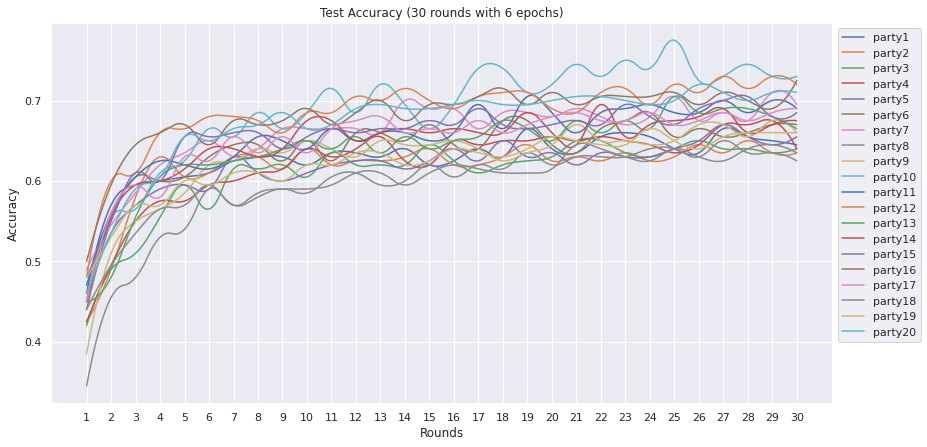

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

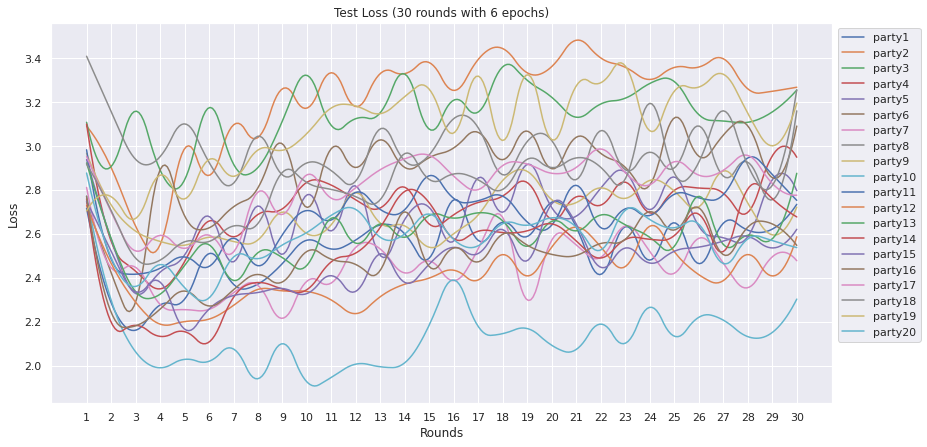

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

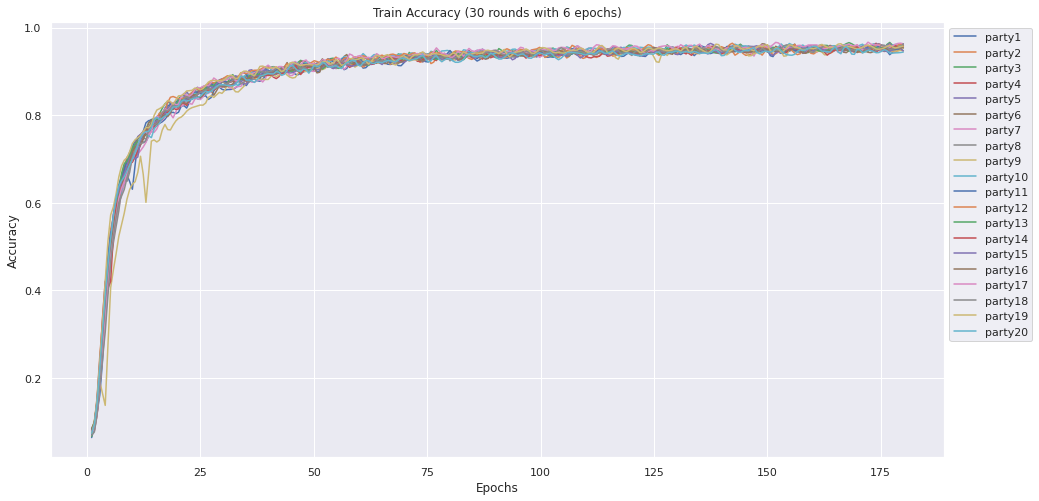

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

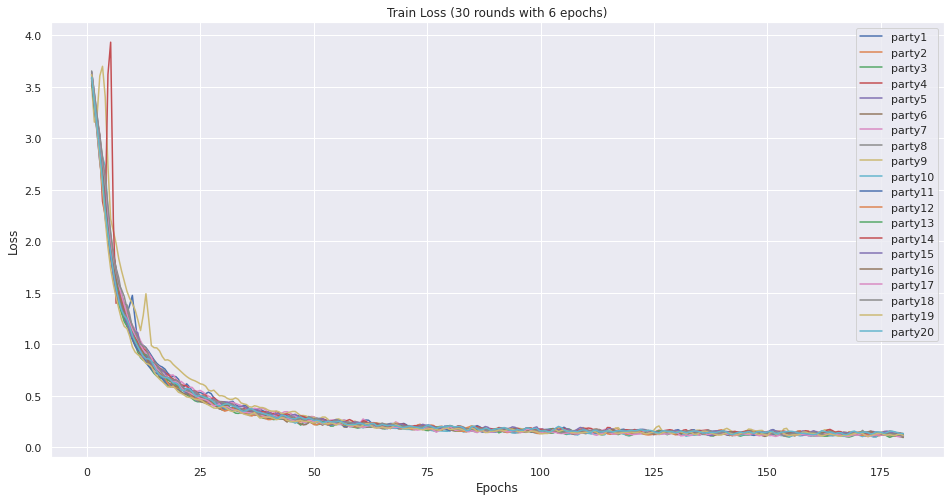

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-12T21:10:35.394Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-12T21:10:35.397Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f4af1d73f28>
2021-06-12T21:10:35.398Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T21:10:36.996Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T21:10:36.997Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T21:10:36.998Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T21:10:36.998Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-12T21:10:37.003Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-12T21:10:37.004Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T21:10:38.417Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T21:10:38.417Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T21:10:38.418Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T21:10:38.419Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-12T21:10:38.419Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-12T21:10:38.425Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-12T21:10:38.425Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T21:10:41.543Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T21:10:41.544Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T21:10:41.545Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T21:10:41.545Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-12T21:10:41.546Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
